## Support Vector Regression (SVR)

#### 1. Margin and Epsilon (ε)

*   **Margin:** the pipe. The goal isn't to have a line that is closest to *all* points, but rather to fit a pipe that contains as many points as possible.
*   **Epsilon (ε):** radius of the pipe.
    *   Any data point that falls **inside** this pipe is considered a "correct" prediction with zero error. The model doesn't care how far a point is from the center line, as long as it's inside the pipe.
    *   Any data point that falls **outside** the pipe is considered an error, and the model will be penalized for it.
    *   **Larger** epsilon means a wider pipe, allowing more error and resulting in a "simpler" model (fewer support vectors). **Smaller** epsilon means a narrower pipe, making the model more sensitive to errors.

#### 2. Regularization and C

*   **Regularization:** a technique to prevent overfitting. It discourages the model from becoming overly complex and "memorizing" the training data and performs poorly on unseen data.
*   **C (Regularization Parameter):** controls the **trade-off between the pipe's flatness (simplicity) and how much you tolerate points falling outside the pipe.**
    *   **Small** `C` creates a "soft margin." It prioritizes a simpler, flatter pipe, even if it means more points fall outside. This is **stronger regularization**.
    *   **Large** `C` creates a "hard margin." The model is heavily penalized for any points outside the pipe. It will try to make the pipe bend and twist to contain as many points as possible, risking overfitting. This is **weaker regularization**.

#### 3. Kernels and the RBF Kernel

*   **Kernels:** Imagine your data points can't be separated by a straight line (or a flat pipe) in 2D. A kernel is a mathematical function that allows the model to operate in a **higher-dimensional space without actually calculating the coordinates in that space.** It's a computational shortcut. In this higher dimension, the data might become linearly separable.
    *   **Analogy:** You have red and blue marbles on a table that you can't separate with a ruler. The kernel trick is like hitting the table from underneath, launching the marbles into the air. Now, you can easily slide a piece of paper between them to separate them. The kernel does this mathematically.

*   **RBF (Radial Basis Function) Kernel:** one of the most popular and powerful kernels.
    *   **How it works:** It measures the "influence" or similarity of data points based on distance. Each support vector acts like a beacon, and its influence radiates outwards like a bell curve (a Gaussian distribution). The final regression line is a weighted sum of the influences of all these support vectors.
    *   **Flexibility:** Because it can combine many of these "influence zones," the RBF kernel can create incredibly complex and non-linear decision boundaries or regression lines, which is why it's so flexible.

### Comparison between SVR and Polynomial Regression

| Feature                    | **SVR (Support Vector Regression)**              | **Polynomial Regression**                     |
| -------------------------- | ------------------------------------------------ | --------------------------------------------- |
| **Model Type**             | Non-parametric                                   | Parametric                                    |
| **Handling Non-Linearity** | Via kernels (e.g., `'rbf'`)                      | By adding polynomial terms (e.g., $x^2, x^3$) |
| **Flexibility**            | Very flexible with kernels like `'rbf'`          | Limited by degree of the polynomial           |
| **Overfitting Risk**       | Controlled via regularization (`C`, `epsilon`)   | High risk at higher degrees                   |
| **Noise Tolerance**        | Ignores small errors within `epsilon` margin     | Fits all data points (no margin concept)      |
| **Training Complexity**    | Computationally expensive (esp. with large data) | Simpler and faster                            |
| **Interpretability**       | Hard to interpret, especially with kernels       | Easier to interpret (equation-based)          |
| **Scaling Required?**      | Yes, always                                      | Sometimes (if magnitudes vary widely)         |


#### SVR (Support Vector Regression)

*   **Core Idea:** SVR’s main goal is not to minimize the sum of squared errors for all points (like in standard regression). Instead, it tries to find the best-fitting "pipe" (defined by `epsilon`) that contains the maximum number of data points. The model is only penalized for points that lie *outside* this pipe.
*   **Strengths:**
    *   **Noise Tolerance:** By ignoring points within the `epsilon` margin, it's robust to small amounts of noise.
    *   **Non-Linearity:** Using kernels like `'rbf'`, it can model extremely complex, non-linear relationships without you having to manually engineer features.
    *   **Effective on High-Dimensional Data:** It works well even when you have many features.
*   **Weaknesses:**
    *   **Interpretability:** You can't write down a simple equation like `y = ax^2 + bx + c`. The prediction is a complex combination of kernel calculations.
    *   **Scaling is Crucial:** It's based on distance calculations, so features with large magnitudes will dominate those with small magnitudes. You **must** scale your data.

#### Polynomial Regression

*   **Core Idea:** a linear regression model applied to a non-linear problem. You have `x`, you create `x^2`, `x^3`, etc, then, you fit a straight line to this new set of features.
*   **Strengths:**
    *   **Interpretability:** The result is a simple polynomial equation (`y = w_0 + w_1x + w_2x^2 + ...`).
    *   **Simplicity & Speed:** much faster and less computationally intensive to train.
*   **Weaknesses:**
    *   **Overfitting Risk:** A high-degree polynomial will perfectly fit the training data but will likely perform terribly on new data because it wiggles excessively to catch every point.
    *   **Limited Flexibility:** You are limited by the degree of the polynomial you choose. It may not be flexible enough to capture very complex patterns that an RBF kernel in SVR could.

**SVR's Complexity:** The training process for SVR involves solving a constrained quadratic optimization problem. The core of this involves calculations with a **kernel matrix**, which is an N x N matrix where N is the number of training samples. The complexity is typically between **O(N²)** and **O(N³)**. If you double your dataset size, the training time could increase by 4x to 8x.

**Polynomial Regression's Complexity:** This is a two-step process:
* **Feature Creation:** Creating the polynomial terms (e.g., `x^2`, `x^3`).
* **Fitting Linear Regression:** Solving for the coefficients of the linear model is computationally efficient. Often close to **O(d²N)** where `d` is the number of features (the polynomial degree).

This dataset has `Position,Level,Salary`, we only care about `level`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('../Data/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values # only get the second column (Level)
y = dataset.iloc[:, -1].values

In [3]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y = y.reshape(len(y),1) # reshape y to be a 2D array for feature scaling
print(y)

### Feature Scaling

**StandardScaler**: standardize features by removing the mean and scaling to unit variance.
- Removing the Mean: It subtracts the average value (mean) of each feature from the data. This centers the data around zero.
- Scaling to Unit Variance: It then scales the data so that the values have a standard deviation of 1. This means that the spread of the data is adjusted to a consistent scale.

Usage:
- Improves Model Performance: Many machine learning algorithms work better when features are on a similar scale.
- Speeds Up Convergence: It helps algorithms converge faster during training.

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [7]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Training the SVR model on the whole dataset

When to use SVR model:
- Non-linear relationships between features and the target.
- Robust performance on small to medium-sized datasets.
- Your data has noise or outliers, and you want to ignore small deviations (SVR uses an epsilon-insensitive tube).
- You need regularization to avoid overfitting.
- You're aiming for smooth, continuous output, especially with non-linear kernels like 'rbf'

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # using a radial basis function
regressor.fit(X, y)

e:\Apps\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predicting a new result

In [10]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

### Visualising the SVR results

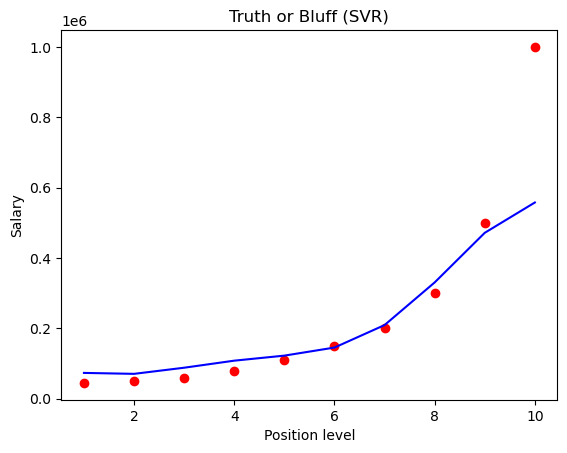

In [11]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

The last and highest point is called outliers or noise, SVR will ignore that if that's what you aim for.

In [12]:
from sklearn.metrics import r2_score
y_pred = sc_y.inverse_transform(regressor.predict(X).reshape(-1,1))
print('R2 score:', r2_score(sc_y.inverse_transform(y), y_pred))

R2 score: 0.7516001070620798
